## Aprendizado Supervisionado

Prática com KNN e diabetes data set

In [1]:
# pacotes básicos
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pacotes do sklearn para acesso a datasets, preparação, modelagem e avaliação
from sklearn import datasets
# pacote pipeline para combinar preparação e modelagem
from sklearn.pipeline import Pipeline, make_pipeline
# arsenal de preparação
from sklearn.preprocessing import MinMaxScaler # rescala em min-max
from sklearn.preprocessing import StandardScaler # padroniza features removendo média e 
#     escalando para variância unitária. Também chamado de z-score
#
from sklearn.neighbors import KNeighborsRegressor as knnr
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
#
#    opções de seleção de modelo de entrada
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold as kf
from sklearn.utils import resample

#pacotes para apoio a leitura e gravação de datasets
from pathlib import Path
import csv
import pprint

In [2]:
# carga de dados 
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [3]:
X = diabetes.data
y = diabetes.target


In [4]:
diabetes.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## Execuções com separação em treino e teste

In [5]:
# separação em treino e teste, e X e y

treino_X, teste_X, treino_y, teste_y = tts(X, y, random_state=0, test_size=0.2)

print(treino_X.shape)
print(treino_y.shape)
print(teste_X.shape)
print(teste_y.shape)

(353, 10)
(353,)
(89, 10)
(89,)


k= 1   MAE= 66.46067415730337   RMSE= 89.88838272165434
k= 3   MAE= 51.269662921348306   RMSE= 66.44961858609275
k= 5   MAE= 49.49213483146069   RMSE= 65.14155373087065
k= 7   MAE= 48.23434991974318   RMSE= 63.238653246166635
k= 9   MAE= 48.00499375780276   RMSE= 62.32148761065698
k= 11   MAE= 46.80694586312563   RMSE= 60.577696801713685
k= 13   MAE= 45.178910976663786   RMSE= 58.29601733046016
k= 15   MAE= 44.823970037453186   RMSE= 58.33937561001824
k= 17   MAE= 44.38929279576999   RMSE= 58.088504605029655
k= 19   MAE= 44.794204612655236   RMSE= 58.377341519854305


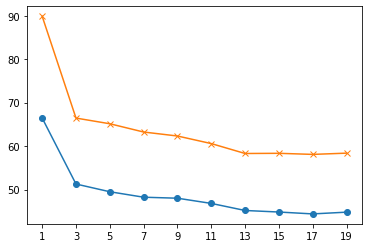

In [6]:
# indução do modelo para diferentes números de vizinhos

n_vizinhos = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

MAEs = []
RMSEs = []

for n in n_vizinhos:
    modelo = knnr(n_neighbors=n)
    modelo.fit(treino_X, treino_y)
    teste_pred_y = modelo.predict(teste_X)
    
    MAE = mae(teste_y, teste_pred_y)
    RMSE = mse(teste_y, teste_pred_y, squared=False)
    print('k=', n,'  MAE=', MAE, '  RMSE=', RMSE)    

    MAEs.append(MAE)
    RMSEs.append(RMSE)

# colocar num gráfico os erros por número de vizinhos

# No eixo x teremos o número de vizinhos e no eixo y o MAE e RMSE
plt.plot(n_vizinhos, MAEs, '-o')
plt.plot(n_vizinhos, RMSEs, '-x')
# Definindo que no eixo x queremos exibir cada numero de vizinhos
plt.xticks(n_vizinhos);

## Execução com amostragens com reposição

k= 1   MAE= 40.13483146067416   RMSE= 66.13095622162527
k= 3   MAE= 47.827715355805246   RMSE= 62.780437007967386
k= 5   MAE= 47.253932584269656   RMSE= 57.96446024664935
k= 7   MAE= 46.28731942215088   RMSE= 55.83970531575231
k= 9   MAE= 46.52184769038701   RMSE= 56.29494736321118
k= 11   MAE= 46.853932584269664   RMSE= 56.967107787496175
k= 13   MAE= 45.251512532411404   RMSE= 55.137228395968094
k= 15   MAE= 45.02322097378277   RMSE= 54.903419003074994
k= 17   MAE= 46.30204890945142   RMSE= 56.3415215818501
k= 19   MAE= 46.70904790065052   RMSE= 56.83403774582466


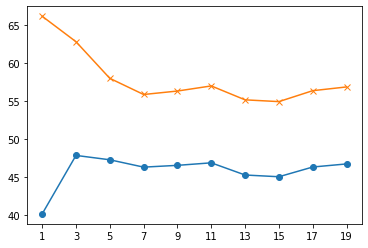

k= 1   MAE= 36.449438202247194   RMSE= 59.65048009262708
k= 3   MAE= 45.082397003745314   RMSE= 57.868236831249256
k= 5   MAE= 49.06292134831461   RMSE= 60.69044313267493
k= 7   MAE= 48.23274478330658   RMSE= 60.377899211045666
k= 9   MAE= 46.50811485642946   RMSE= 57.86722285239882
k= 11   MAE= 47.22778345250255   RMSE= 57.7157420541548
k= 13   MAE= 46.89109766637856   RMSE= 57.874966963939215
k= 15   MAE= 47.338576779026226   RMSE= 58.544428747134766
k= 17   MAE= 48.258426966292134   RMSE= 58.5304958267122
k= 19   MAE= 48.47013601419279   RMSE= 58.79534999143762


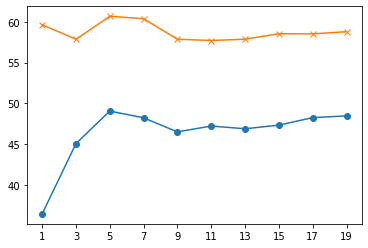

k= 1   MAE= 43.752808988764045   RMSE= 68.45551331610031
k= 3   MAE= 46.561797752808985   RMSE= 59.217831440785744
k= 5   MAE= 45.79325842696629   RMSE= 57.32448934488371
k= 7   MAE= 47.40128410914928   RMSE= 58.4750391149551
k= 9   MAE= 45.118601747815234   RMSE= 55.21387061090198
k= 11   MAE= 44.91726251276813   RMSE= 55.43229178897434
k= 13   MAE= 44.75021607605878   RMSE= 54.54334055534407
k= 15   MAE= 45.55355805243446   RMSE= 55.826706186157054
k= 17   MAE= 45.98083278255122   RMSE= 56.621973980805286
k= 19   MAE= 46.242460082791254   RMSE= 56.18794577207457


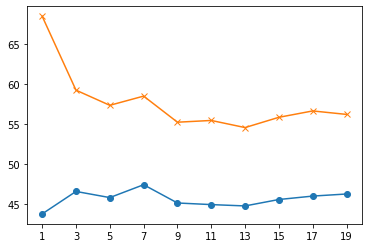

k= 1   MAE= 39.49438202247191   RMSE= 63.95583096643137
k= 3   MAE= 47.42696629213483   RMSE= 62.60249523372163
k= 5   MAE= 47.725842696629215   RMSE= 61.81298361849414
k= 7   MAE= 47.86677367576244   RMSE= 60.65359255133342
k= 9   MAE= 45.78651685393258   RMSE= 59.117884445741055
k= 11   MAE= 46.172625127681314   RMSE= 57.2650391259872
k= 13   MAE= 46.535868625756265   RMSE= 56.25446757369469
k= 15   MAE= 47.845692883895126   RMSE= 57.182544502280635
k= 17   MAE= 47.499669530733634   RMSE= 56.911596909224556
k= 19   MAE= 47.397397989355404   RMSE= 56.67629544229859


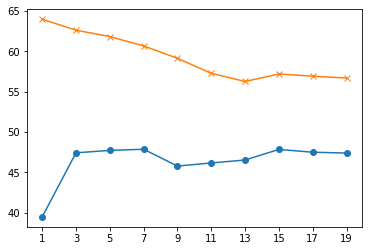

k= 1   MAE= 34.674157303370784   RMSE= 57.7769830925854
k= 3   MAE= 41.40823970037454   RMSE= 56.08046653329268
k= 5   MAE= 43.8247191011236   RMSE= 56.049584789328996
k= 7   MAE= 41.31300160513644   RMSE= 52.347550028994334
k= 9   MAE= 40.70911360799001   RMSE= 50.73804847494818
k= 11   MAE= 40.951991828396324   RMSE= 49.62935516827884
k= 13   MAE= 40.84010371650821   RMSE= 50.174475186512964
k= 15   MAE= 40.877902621722846   RMSE= 50.6768065942573
k= 17   MAE= 42.125578321216125   RMSE= 50.797495229176995
k= 19   MAE= 43.11709047900651   RMSE= 51.73745392186794


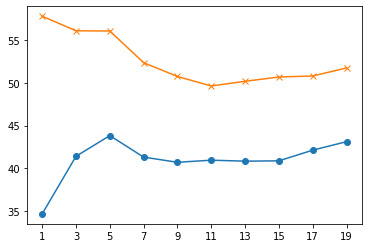

k= 1   MAE= 39.29213483146067   RMSE= 68.23925194210425
k= 3   MAE= 51.86516853932584   RMSE= 67.48775262266057
k= 5   MAE= 50.438202247191015   RMSE= 64.31280649024488
k= 7   MAE= 48.842696629213485   RMSE= 62.49267051725996
k= 9   MAE= 48.40574282147316   RMSE= 61.98681503269122
k= 11   MAE= 49.27783452502554   RMSE= 62.3114051205501
k= 13   MAE= 48.77873811581676   RMSE= 61.228586172173756
k= 15   MAE= 48.46441947565544   RMSE= 60.826209115444684
k= 17   MAE= 47.369464639788504   RMSE= 59.75315395431478
k= 19   MAE= 47.860437610881135   RMSE= 59.58025598653119


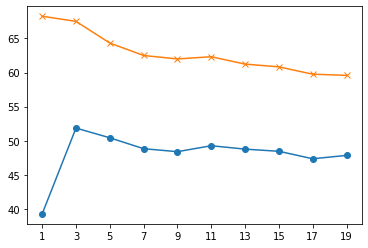

k= 1   MAE= 42.97752808988764   RMSE= 69.29103254398245
k= 3   MAE= 46.355805243445694   RMSE= 62.658667510825744
k= 5   MAE= 47.38202247191011   RMSE= 61.02528118591692
k= 7   MAE= 48.30337078651685   RMSE= 61.86074967520482
k= 9   MAE= 49.23720349563047   RMSE= 61.45682825766639
k= 11   MAE= 49.33707865168538   RMSE= 60.99492298203941
k= 13   MAE= 49.39412273120138   RMSE= 60.49530562387819
k= 15   MAE= 48.503370786516854   RMSE= 59.38465398223066
k= 17   MAE= 47.03965631196299   RMSE= 57.9588714881866
k= 19   MAE= 47.710821998817266   RMSE= 57.84380615543987


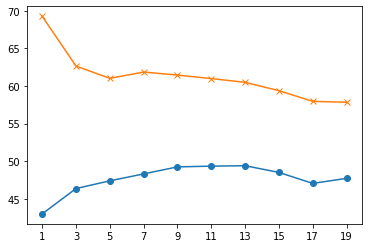

k= 1   MAE= 34.056179775280896   RMSE= 52.81651512228842
k= 3   MAE= 38.40823970037453   RMSE= 51.87292405183932
k= 5   MAE= 38.48988764044944   RMSE= 49.45273535111951
k= 7   MAE= 37.635634028892454   RMSE= 47.83491494050432
k= 9   MAE= 36.55680399500624   RMSE= 46.52042659053194
k= 11   MAE= 37.54034729315629   RMSE= 47.049488608359034
k= 13   MAE= 38.05099394987036   RMSE= 48.10091294292057
k= 15   MAE= 38.92284644194757   RMSE= 48.6552395388387
k= 17   MAE= 39.24388631857238   RMSE= 49.12513171638496
k= 19   MAE= 39.20579538734476   RMSE= 49.19414622855701


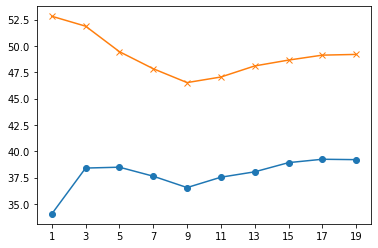

k= 1   MAE= 41.42696629213483   RMSE= 66.65380962164616
k= 3   MAE= 48.138576779026224   RMSE= 64.14034432622842
k= 5   MAE= 47.80898876404494   RMSE= 59.736774663443384
k= 7   MAE= 49.703049759229536   RMSE= 61.006841181518574
k= 9   MAE= 50.06616729088639   RMSE= 61.49182398255353
k= 11   MAE= 50.3585291113381   RMSE= 61.49381568604526
k= 13   MAE= 50.759723422644775   RMSE= 61.48649653406435
k= 15   MAE= 49.16704119850186   RMSE= 60.48698996524938
k= 17   MAE= 49.0158625247852   RMSE= 59.79430905234083
k= 19   MAE= 49.62507392075695   RMSE= 60.48772173497056


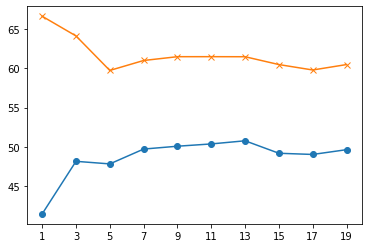

k= 1   MAE= 43.20224719101124   RMSE= 68.37462897625441
k= 3   MAE= 45.53183520599252   RMSE= 59.85003105453217
k= 5   MAE= 43.86966292134832   RMSE= 58.94645828054663
k= 7   MAE= 41.97752808988764   RMSE= 56.038068103899185
k= 9   MAE= 39.73158551810238   RMSE= 52.930326877873426
k= 11   MAE= 39.49438202247191   RMSE= 51.73454444077721
k= 13   MAE= 39.343128781331025   RMSE= 50.85037908532706
k= 15   MAE= 39.29213483146067   RMSE= 50.93168173881626
k= 17   MAE= 39.9239920687376   RMSE= 51.60409613432518
k= 19   MAE= 41.4287403903016   RMSE= 52.749720745116655


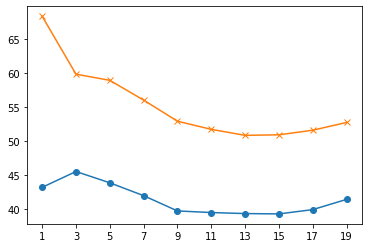

In [7]:
#  criação das amostras para as execuções

n_samples = 10

for i in range(n_samples):

  X_rs, y_rs = resample(X, y, stratify=y)

  treino_X, teste_X, treino_y, teste_y = tts(X_rs, y_rs, random_state=0, test_size=0.2)
  
  n_vizinhos = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

  MAEs = []
  RMSEs = []

  for n in n_vizinhos:
      modelo = knnr(n_neighbors=n)
      modelo.fit(treino_X, treino_y)
      teste_pred_y = modelo.predict(teste_X)
      
      MAE = mae(teste_y, teste_pred_y)
      RMSE = mse(teste_y, teste_pred_y, squared=False)
      print('k=', n,'  MAE=', MAE, '  RMSE=', RMSE)    

      MAEs.append(MAE)
      RMSEs.append(RMSE)

  # colocar num gráfico os erros por número de vizinhos

  # No eixo x teremos o número de vizinhos e no eixo y o MAE e RMSE
  plt.plot(n_vizinhos, MAEs, '-o')
  plt.plot(n_vizinhos, RMSEs, '-x')
  # Definindo que no eixo x queremos exibir cada numero de vizinhos
  plt.xticks(n_vizinhos);
  plt.show()

##  Experimentos com validação cruzada

k= 1   MAE= 45.666666666666664   RMSE= 66.18945871091896
k= 3   MAE= 42.48888888888889   RMSE= 58.70617356645564
k= 5   MAE= 46.93333333333333   RMSE= 60.50262069622366
k= 7   MAE= 46.955555555555556   RMSE= 60.47156712736161
k= 9   MAE= 46.83456790123456   RMSE= 58.63201370880987
k= 11   MAE= 49.55757575757575   RMSE= 60.78850569180348
k= 13   MAE= 49.153846153846146   RMSE= 59.982930949226684
k= 15   MAE= 49.22814814814815   RMSE= 59.94573595560621
k= 17   MAE= 48.333333333333336   RMSE= 59.373826623910354
k= 19   MAE= 47.97426900584795   RMSE= 59.13850902948805


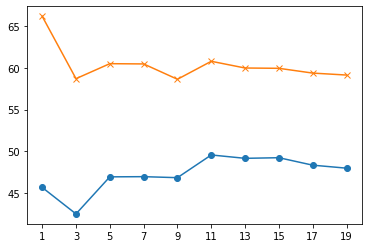

k= 1   MAE= 54.86666666666667   RMSE= 73.04899421316871
k= 3   MAE= 48.65185185185184   RMSE= 59.18103633537009
k= 5   MAE= 43.94222222222222   RMSE= 54.726982985239246
k= 7   MAE= 44.396825396825406   RMSE= 56.09935711290038
k= 9   MAE= 42.449382716049385   RMSE= 53.22124538395808
k= 11   MAE= 44.630303030303025   RMSE= 53.876606289132205
k= 13   MAE= 44.74871794871795   RMSE= 53.99599420211726
k= 15   MAE= 45.50222222222222   RMSE= 55.02278405744386
k= 17   MAE= 45.82222222222222   RMSE= 55.208076570097795
k= 19   MAE= 46.00116959064328   RMSE= 55.32527113667469


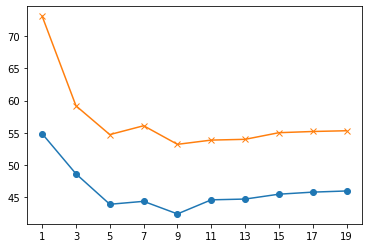

k= 1   MAE= 60.06818181818182   RMSE= 75.8537767981625
k= 3   MAE= 58.72727272727272   RMSE= 72.33445048711387
k= 5   MAE= 51.91363636363636   RMSE= 67.61620972948586
k= 7   MAE= 48.97077922077922   RMSE= 65.81062602055286
k= 9   MAE= 47.681818181818194   RMSE= 65.39323338038606
k= 11   MAE= 46.08677685950413   RMSE= 63.02213902679874
k= 13   MAE= 45.1048951048951   RMSE= 61.75387995162855
k= 15   MAE= 42.75757575757576   RMSE= 58.91247402681029
k= 17   MAE= 42.86497326203209   RMSE= 58.74669380241487
k= 19   MAE= 42.91985645933014   RMSE= 58.73020222369374


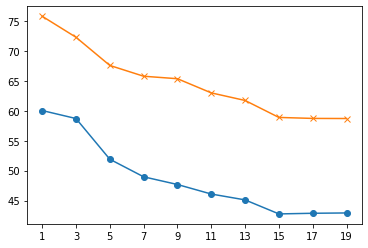

k= 1   MAE= 49.86363636363637   RMSE= 70.75373424131696
k= 3   MAE= 48.84090909090909   RMSE= 61.11838570108892
k= 5   MAE= 47.99545454545455   RMSE= 58.784173813273
k= 7   MAE= 49.30519480519481   RMSE= 61.67773388462693
k= 9   MAE= 46.98232323232324   RMSE= 59.700747842295016
k= 11   MAE= 45.45867768595041   RMSE= 56.78017241047428
k= 13   MAE= 44.92657342657342   RMSE= 55.70468654683674
k= 15   MAE= 45.33030303030303   RMSE= 56.25079124022625
k= 17   MAE= 45.25668449197861   RMSE= 55.4479031082929
k= 19   MAE= 46.0299043062201   RMSE= 56.57207313308101


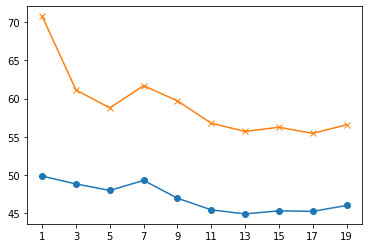

k= 1   MAE= 66.61363636363636   RMSE= 85.41303392127202
k= 3   MAE= 50.54545454545455   RMSE= 63.84043397487998
k= 5   MAE= 49.949999999999996   RMSE= 61.34256271138336
k= 7   MAE= 49.805194805194795   RMSE= 59.36305391981158
k= 9   MAE= 48.795454545454554   RMSE= 59.21866165126121
k= 11   MAE= 50.49793388429751   RMSE= 60.793007983520994
k= 13   MAE= 48.19930069930069   RMSE= 58.67355280547248
k= 15   MAE= 48.559090909090905   RMSE= 57.84611508392789
k= 17   MAE= 47.61497326203209   RMSE= 56.75525952821025
k= 19   MAE= 47.64593301435407   RMSE= 55.77378130842881


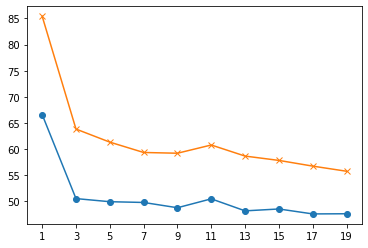

k= 1   MAE= 52.88636363636363   RMSE= 73.80302408191933
k= 3   MAE= 47.50757575757576   RMSE= 63.86149390705172
k= 5   MAE= 44.972727272727276   RMSE= 60.963342189459155
k= 7   MAE= 46.59415584415585   RMSE= 60.78938441771698
k= 9   MAE= 47.29545454545455   RMSE= 60.60371312793778
k= 11   MAE= 49.396694214876035   RMSE= 62.92362071254529
k= 13   MAE= 49.99475524475525   RMSE= 62.02308195339305
k= 15   MAE= 50.050000000000004   RMSE= 62.26030643657126
k= 17   MAE= 51.00534759358288   RMSE= 62.84287640970222
k= 19   MAE= 50.94258373205742   RMSE= 62.52372604306089


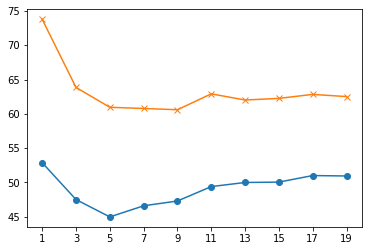

k= 1   MAE= 56.20454545454545   RMSE= 72.45421751950424
k= 3   MAE= 49.41666666666667   RMSE= 69.32548396710064
k= 5   MAE= 52.51818181818182   RMSE= 66.81650585405866
k= 7   MAE= 49.493506493506494   RMSE= 63.05570026418746
k= 9   MAE= 49.3939393939394   RMSE= 61.93460763495336
k= 11   MAE= 50.71694214876033   RMSE= 63.64608396836281
k= 13   MAE= 50.27622377622378   RMSE= 63.510784029204856
k= 15   MAE= 48.943939393939395   RMSE= 62.09322170590106
k= 17   MAE= 48.31283422459894   RMSE= 60.81973581193884
k= 19   MAE= 48.5023923444976   RMSE= 61.34341944776306


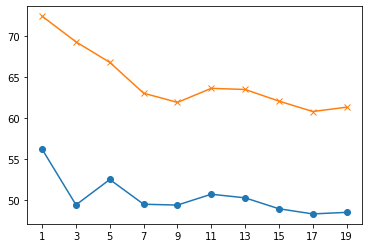

k= 1   MAE= 62.65909090909091   RMSE= 79.99417592436453
k= 3   MAE= 42.962121212121204   RMSE= 56.28290283483211
k= 5   MAE= 41.277272727272724   RMSE= 53.16344437846196
k= 7   MAE= 40.688311688311686   RMSE= 49.84888109272526
k= 9   MAE= 37.868686868686865   RMSE= 47.776180382034994
k= 11   MAE= 35.03305785123967   RMSE= 45.49071701276082
k= 13   MAE= 34.35314685314685   RMSE= 44.15106226452009
k= 15   MAE= 34.07575757575757   RMSE= 44.27005509119881
k= 17   MAE= 33.592245989304814   RMSE= 44.73265364341529
k= 19   MAE= 34.55622009569378   RMSE= 45.53155029785184


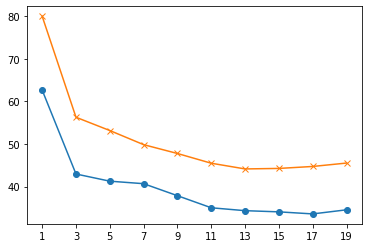

k= 1   MAE= 77.18181818181819   RMSE= 97.49988344981378
k= 3   MAE= 60.439393939393945   RMSE= 77.7011238429963
k= 5   MAE= 56.104545454545445   RMSE= 72.33537422061465
k= 7   MAE= 55.07142857142858   RMSE= 68.00368319174915
k= 9   MAE= 53.07575757575758   RMSE= 64.42376017759965
k= 11   MAE= 50.7706611570248   RMSE= 60.86967856490653
k= 13   MAE= 51.43181818181818   RMSE= 61.52366408629731
k= 15   MAE= 52.01818181818182   RMSE= 62.32038270911132
k= 17   MAE= 53.12032085561498   RMSE= 63.6509520194727
k= 19   MAE= 52.33014354066986   RMSE= 62.59962696693082


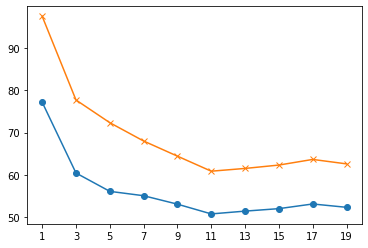

k= 1   MAE= 62.84090909090909   RMSE= 81.88281537994071
k= 3   MAE= 45.265151515151516   RMSE= 56.4749206875642
k= 5   MAE= 45.65909090909091   RMSE= 54.420609398211695
k= 7   MAE= 45.370129870129865   RMSE= 55.109572082034305
k= 9   MAE= 43.03787878787878   RMSE= 53.350673212350365
k= 11   MAE= 41.510330578512395   RMSE= 52.74768591745881
k= 13   MAE= 40.209790209790214   RMSE= 51.03559601148442
k= 15   MAE= 41.68636363636363   RMSE= 50.74855125563147
k= 17   MAE= 41.085561497326196   RMSE= 49.87744180495433
k= 19   MAE= 40.53827751196172   RMSE= 49.055941476107435


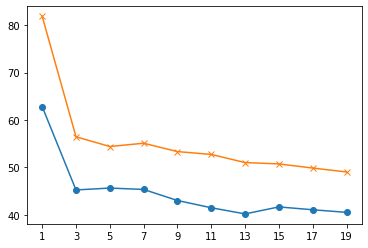

In [8]:
#  criação das amostras para as execuções

n_splits = 10

dkf = kf(n_splits=n_splits)

for treino_index, teste_index in dkf.split(X, y):

  treino_X, teste_X = X.iloc[treino_index], X.iloc[teste_index]
  treino_y, teste_y = y.iloc[treino_index], y.iloc[teste_index]
    
  n_vizinhos = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

  MAEs = []
  RMSEs = []

  for n in n_vizinhos:
      modelo = knnr(n_neighbors=n)
      modelo.fit(treino_X, treino_y)
      teste_pred_y = modelo.predict(teste_X)
      
      MAE = mae(teste_y, teste_pred_y)
      RMSE = mse(teste_y, teste_pred_y, squared=False)
      print('k=', n,'  MAE=', MAE, '  RMSE=', RMSE)    

      MAEs.append(MAE)
      RMSEs.append(RMSE)

  # colocar num gráfico os erros por número de vizinhos

  # No eixo x teremos o número de vizinhos e no eixo y o MAE e RMSE
  plt.plot(n_vizinhos, MAEs, '-o')
  plt.plot(n_vizinhos, RMSEs, '-x')
  # Definindo que no eixo x queremos exibir cada numero de vizinhos
  plt.xticks(n_vizinhos);
  plt.show()